In [43]:
import pandas as pd
import numpy as np

sentiment140 = pd.read_csv('data/sentiment140.csv') # Only 139 neutral example
climatechange = pd.read_csv('data/climatechange.csv')
moviereview = pd.read_csv('data/moviereview.csv')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import scikitplot as skplt

class Model:
    def __init__(self, data):
        self.x = data.text
        self.y = data.target
        self.params = [{'clf__alpha': np.arange(0.05, 1, 0.05)}]
        self.split()
        
    def split(self):
        self.train_x, self.val_x, self.train_y, self.val_y = train_test_split(self.x, 
                                                                              self.y, 
                                                                              test_size=0.2, 
                                                                              stratify=self.y, 
                                                                              random_state=42)
    def accuracy(self, x=None, y=None):
        if not not (x is None) or not not (y is None):
            x = self.val_x
            y = self.val_y
            
        pred = self.model.predict(x)
        acc = accuracy_score(pred, y)
        print('Accuracy: {:.5f}'.format(acc))
        skplt.metrics.plot_confusion_matrix(y, pred, normalize=True, figsize=(15,15))
        plt.show()
        return pred
    
    def train(self):
        print("Creating model... ", end='')
        nb = Pipeline([('vect', CountVectorizer(lowercase=True, ngram_range=(1, 1), analyzer='word')),
                            ('tfidf', TfidfTransformer()),
                            ('clf', MultinomialNB())])
        self.model = GridSearchCV(nb, self.params, cv=5)
        print("ok\nTraining...", end='')
        self.model.fit(self.train_x, self.train_y)
        print("ok\nBest params: ", self.model.best_params_)

In [49]:
s140 = Model(sentiment140)
s140.train()
s140.accuracy()

Creating model... ok
Training...

KeyboardInterrupt: 

Accuracy: 0.71148


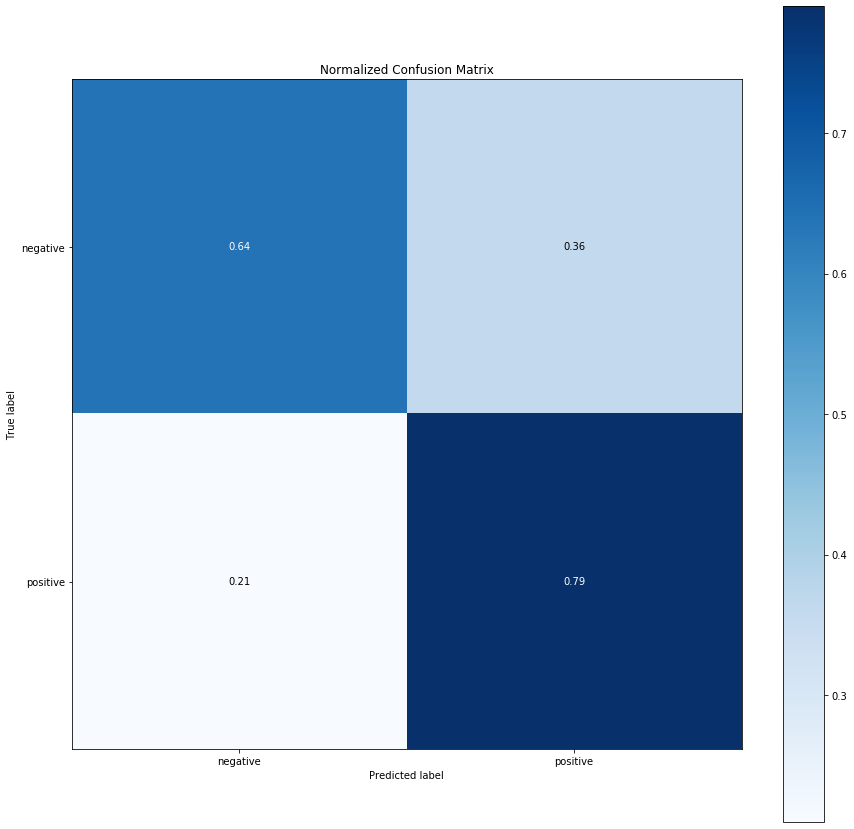

In [34]:
x = moviereview.text
y = moviereview.target

pred = s140.accuracy(x, y)

In [38]:
n = 0
n1 = 0
for i in s140.y:
    if i == 'neutral':
        n += 1
    else:
        n1 += 1
        
print(n)
print(n1)

139
1600359
